In [0]:
import numpy as np
import pandas as pd
from scipy.stats import itemfreq
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from normalization import normalize_corpus

# Word similarity  using Bag of Characters

In [0]:
root = 'Work'
term1 = 'work'
term2 = 'marketing'
term3 = 'Tiger'

In [0]:
terms = [root, term1, term2, term3]

In [0]:
def cosineDistance(u, v):
    distance = 1.0 - (np.dot(u, v) / 
                        (np.sqrt(sum(np.square(u))) * np.sqrt(sum(np.square(v))))
                     )
    return distance

In [51]:
wordList = [word.lower() for word in terms]
wordList

['work', 'work', 'marketing', 'tiger']

In [53]:
[list(word) for word in wordList]

[['w', 'o', 'r', 'k'],
 ['w', 'o', 'r', 'k'],
 ['m', 'a', 'r', 'k', 'e', 't', 'i', 'n', 'g'],
 ['t', 'i', 'g', 'e', 'r']]

In [54]:
np.hstack([list(word) for word in wordList])

array(['w', 'o', 'r', 'k', 'w', 'o', 'r', 'k', 'm', 'a', 'r', 'k', 'e',
       't', 'i', 'n', 'g', 't', 'i', 'g', 'e', 'r'], dtype='<U1')

In [56]:
uniqueChars = np.unique(np.hstack([list(word) for word in wordList]))
len(uniqueChars)

11

In [57]:
wordListTermCounts = [{char: count for char, count in itemfreq(list(word))} for word in wordList]
wordListTermCounts

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


[{'k': '1', 'o': '1', 'r': '1', 'w': '1'},
 {'k': '1', 'o': '1', 'r': '1', 'w': '1'},
 {'a': '1',
  'e': '1',
  'g': '1',
  'i': '1',
  'k': '1',
  'm': '1',
  'n': '1',
  'r': '1',
  't': '1'},
 {'e': '1', 'g': '1', 'i': '1', 'r': '1', 't': '1'}]

In [58]:
bocVectors = [np.array([int(word_term_counts.get(char, 0)) for char in uniqueChars])
                   for word_term_counts in wordListTermCounts]
bocVectors

[array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]),
 array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])]

In [0]:
def bocTermVectors(wordList):
    wordList = [word.lower() for word in wordList]
    uniqueChars = np.unique(np.hstack([list(word) for word in wordList]))
    wordListTermCounts = [{char: count for char, count in itemfreq(list(word))} for word in wordList]
    bocVectors = [np.array([int(word_term_counts.get(char, 0)) for char in uniqueChars])
                   for word_term_counts in wordListTermCounts]
    return list(uniqueChars), bocVectors

In [0]:
terms = [root, term1, term2, term3] # recall terms list

In [62]:
features, (boc_root, boc_term1, boc_term2, boc_term3) = bocTermVectors(terms)
bocVectorTerms = [boc_term1, boc_term2, boc_term3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  after removing the cwd from sys.path.


In [63]:
bocVectorTerms

[array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])]

In [64]:
for term, boc_term in zip(terms, bocVectorTerms):
    print('Similarity between root: {} and term: {}'.format(root, term))
    distance = cosineDistance(boc_root, boc_term)
    similarity = 1 - distance                                                           
    print('Cosine distance  is {}'.format(distance))
    print('Cosine similarity  is {}'.format(similarity))

Similarity between root: Work and term: Work
Cosine distance  is 0.0
Cosine similarity  is 1.0
Similarity between root: Work and term: work
Cosine distance  is 0.6666666666666667
Cosine similarity  is 0.33333333333333326
Similarity between root: Work and term: marketing
Cosine distance  is 0.7763932022500211
Cosine similarity  is 0.22360679774997894


# Document Similarity  using Bag of Words

In [0]:
def buildFeatureMatrix(documents, feature_type='frequency', ngram_range=(1, 1), min_df=0.0, max_df=1.0):

    feature_type = feature_type.lower().strip()  
    
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix

In [0]:
toyCorpus = ['The sky is clear',
'The sky is clear, blue and beautiful',
'Python is a good programming language for data science applications',
'Python, C++ and Java are popular programming languages',
'Among programming languages, both Python and Java are the most used in data analytics',
'The dog is quicker than the lazy fox',
'The fox is smarter than the dog',
'Cat, dog and fox are good friends']

In [0]:
queryDocs = ['The dog is smarter than the fox',
            'C++ is a static typed programming language unlike Python',
            'I love to play under the beautiful clear and blue sky!']

In [0]:
# extract features from the toy corpus
tfidf_vectorizer, tfidf_features = buildFeatureMatrix(toyCorpus,
                                                        feature_type='tfidf',
                                                        ngram_range=(1, 1), 
                                                        min_df=0.0, max_df=1.0)

In [0]:
# extract features from the query corpus
queryDocsTfidf = tfidf_vectorizer.transform(queryDocs)

In [0]:
def computeCosineSimilarity(doc_features, corpus_features, top_n=3):
    # get document vectors
    doc_features = doc_features.toarray()[0]
    corpus_features = corpus_features.toarray()
    # compute similarities
    similarity = np.dot(doc_features, corpus_features.T)
    # get docs with highest similarity scores
    top_docs = similarity.argsort()[::-1][:top_n]
    top_docs_with_score = [(index, round(similarity[index], 3))
                            for index in top_docs]
    return top_docs_with_score

Find similar documents using cosine similarity

In [75]:
for index, doc in enumerate(queryDocs):    
    doc_tfidf = queryDocsTfidf[index]
    top_similar_docs = computeCosineSimilarity(doc_tfidf, tfidf_features, top_n=2)
    print('Document',index+1 ,':', doc)
    print( 'Top', len(top_similar_docs), 'similar docs:')
    print( '-'*40 )
    for doc_index, sim_score in top_similar_docs:
        print( 'Doc num: {} Similarity Score: {}\nDoc: {}'.format(doc_index+1, sim_score, toyCorpus[doc_index]))

Document 1 : The dog is smarter than the fox
Top 2 similar docs:
----------------------------------------
Doc num: 7 Similarity Score: 1.0
Doc: The fox is smarter than the dog
Doc num: 6 Similarity Score: 0.693
Doc: The dog is quicker than the lazy fox
Document 2 : C++ is a static typed programming language unlike Python
Top 2 similar docs:
----------------------------------------
Doc num: 3 Similarity Score: 0.591
Doc: Python is a good programming language for data science applications
Doc num: 4 Similarity Score: 0.325
Doc: Python, C++ and Java are popular programming languages
Document 3 : I love to play under the beautiful clear and blue sky!
Top 2 similar docs:
----------------------------------------
Doc num: 2 Similarity Score: 0.964
Doc: The sky is clear, blue and beautiful
Doc num: 1 Similarity Score: 0.594
Doc: The sky is clear


# Document Clustering using Bag of Words Models

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Load the news data
data = pd.read_csv('/content/drive/My Drive/classNotes/statisticalNLP/dseNLP/news.csv')

In [78]:
data.head(2)

,news_headline,news_article,news_category,full_text,clean_text
0,Japan hotel offers room for ₹66 to guests read...,A hotel in Japan named Business Ryokan Asahi i...,travel,Japan hotel offers room for ₹66 to guests read...,japan hotel offer room guest ready livestream ...
1,"UK family books 5-star hotel in Egypt, reaches...",A UK family that booked a five-star hotel in E...,travel,"UK family books 5-star hotel in Egypt, reaches...",uk family book star hotel egypt reach find not...


In [0]:
titles = data['news_headline'].tolist()
synopses = data['news_article'].tolist()

In [80]:
titles[0]

'Japan hotel offers room for ₹66 to guests ready to livestream their stay'

In [81]:
synopses[0][:1000]

"A hotel in Japan named Business Ryokan Asahi is offering one of its rooms for only 100 yen (around ₹66) per night to the guests who agree to have their entire stay live-streamed. The feed is video-only to ensure guests will have privacy in their conversations or phone calls. The hotel room offers a shared bathroom outside the camera's range."

In [0]:
# extract tf-idf features
vectorizer, feature_matrix = buildFeatureMatrix(synopses, feature_type='tfidf', min_df=0.2, max_df=0.8, ngram_range=(1, 1))

In [83]:
# view number of features
feature_matrix.shape

(75, 22)

In [0]:
# get feature names
feature_names = vectorizer.get_feature_names()

In [85]:
feature_names

['against',
 'an',
 'and',
 'be',
 'by',
 'first',
 'for',
 'from',
 'has',
 'he',
 'his',
 'in',
 'india',
 'is',
 'it',
 'of',
 'on',
 'said',
 'that',
 'to',
 'was',
 'with']

In [86]:
# print sample features
feature_names[:20]

['against',
 'an',
 'and',
 'be',
 'by',
 'first',
 'for',
 'from',
 'has',
 'he',
 'his',
 'in',
 'india',
 'is',
 'it',
 'of',
 'on',
 'said',
 'that',
 'to']

In [0]:
from sklearn.cluster import KMeans

In [0]:
def kMeans(feature_matrix, num_clusters=3):
    km = KMeans(n_clusters=num_clusters)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

In [0]:
km_obj, clusters = kMeans(feature_matrix=feature_matrix, num_clusters=3)

In [0]:
data['cluster'] = clusters

In [0]:
from collections import Counter

In [92]:
# get the total number of news per cluster
c = Counter(clusters)
c.items()

dict_items([(0, 27), (2, 30), (1, 18)])

In [0]:
def get_cluster_data(clustering_obj, data, 
                     feature_names, num_clusters,
                     topn_features=10):

    cluster_details = {}  
    # get cluster centroids
    ordered_centroids = clustering_obj.cluster_centers_.argsort()[:, ::-1]
    # get key features for each cluster
    # get news belonging to each cluster
    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num
        key_features = [feature_names[index] 
                        for index 
                        in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features
        
        news = data[data['cluster'] == cluster_num]['news_headline'].values.tolist()
        cluster_details[cluster_num]['news'] = news
    
    return cluster_details


In [0]:
def print_cluster_data(cluster_data):
    # print cluster details
    for cluster_num, cluster_details in cluster_data.items():
        print('Cluster {} details:'.format(cluster_num))
        print( '-'*20 )
        print( 'Key features:', cluster_details['key_features'])
        print( 'News in this cluster:')
        print( ', '.join(cluster_details['news']))
        print( '='*40 )


In [0]:
cluster_data =  get_cluster_data(clustering_obj=km_obj,
                                 data=data,
                                 feature_names=feature_names,
                                 num_clusters=3,
                                 topn_features=5)          

In [0]:
print_cluster_data(cluster_data)

Cluster 0 details:
--------------------
Key features: ['india', 'his', 'in', 'first', 'against']
News in this cluster:
Kuldeep Yadav becomes first Indian to take two hat-tricks in international cricket, Rohit Sharma has hit India's highest ODI score each year since 2013, I don't need permission in my own country to say what I feel: Irfan Pathan, KL Rahul smashes his third hundred in ODI cricket, first in India , Virat Kohli gets out on golden duck in ODI cricket after six years, Please keep Sana out of all this: Ganguly after she posts book excerpt over CAA, Both captains get out for a golden duck in an ODI for the first time in history, Let it stay a mystery: KL Rahul on his celebration after scoring 3rd ODI ton, Rohit Sharma smashes 10 hundreds in a year for the first time in his career, Rohit hits his 18th ODI hundred since start of 2017, overtakes Virat Kohli, Rohit breaks his own world record for most international 6s in a calendar year, What records did Rohit break with his 10th 

# Plot the clusters

In [0]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import random
from matplotlib.font_manager import FontProperties

In [0]:
def plot_clusters(num_clusters, feature_matrix,
                  cluster_data, data,
                  plot_size=(16,8)):
    # generate random color for clusters                  
    def generate_random_color():
        color = '#%06x' % random.randint(0, 0xFFFFFF)
        return color
    # define markers for clusters    
    markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd']
    # build cosine distance matrix
    cosine_distance = 1 - cosine_similarity(feature_matrix) 
    # dimensionality reduction using PCA
    pca = PCA(n_components=2, random_state=1)
    # get coordinates of clusters in new low-dimensional space
    #plot_positions = mds.fit_transform(cosine_distance)  
    plot_positions = pca.fit_transform(cosine_distance)  
    x_pos, y_pos = plot_positions[:, 0], plot_positions[:, 1]
    # build cluster plotting data
    cluster_color_map = {}
    cluster_name_map = {}
    for cluster_num, cluster_details in cluster_data.items():
        # assign cluster features to unique label
        cluster_color_map[cluster_num] = generate_random_color()
        cluster_name_map[cluster_num] = ', '.join(cluster_details['key_features'][:5]).strip()
    # map each unique cluster label with its coordinates and news
    cluster_plot_frame = pd.DataFrame({'x': x_pos,
                                       'y': y_pos,
                                       'label': data['cluster'].values.tolist(),
                                       'title': data['news_headline'].values.tolist()
                                        })
    grouped_plot_frame = cluster_plot_frame.groupby('label')
    # set plot figure size and axes
    fig, ax = plt.subplots(figsize=plot_size) 
    ax.margins(0.05)
    # plot each cluster using co-ordinates and news titles
    for cluster_num, cluster_frame in grouped_plot_frame:
         marker = markers[cluster_num] if cluster_num < len(markers) \
                  else np.random.choice(markers, size=1)[0]
         ax.plot(cluster_frame['x'], cluster_frame['y'], 
                 marker=marker, linestyle='', ms=12,
                 label=cluster_name_map[cluster_num], 
                 color=cluster_color_map[cluster_num], mec='none')
         ax.set_aspect('auto')
         ax.tick_params(axis= 'x', which='both', bottom='off', top='off',        
                        labelbottom='off')
         ax.tick_params(axis= 'y', which='both', left='off', top='off',         
                        labelleft='off')
    fontP = FontProperties()
    fontP.set_size('small')    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.01), fancybox=True, 
              shadow=True, ncol=5, numpoints=1, prop=fontP) 
    #add labels as the film titles
    for index in range(len(cluster_plot_frame)):
        ax.text(cluster_plot_frame.ix[index]['x'], 
                cluster_plot_frame.ix[index]['y'], 
                cluster_plot_frame.ix[index]['title'], size=8)  
    # show the plot           
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


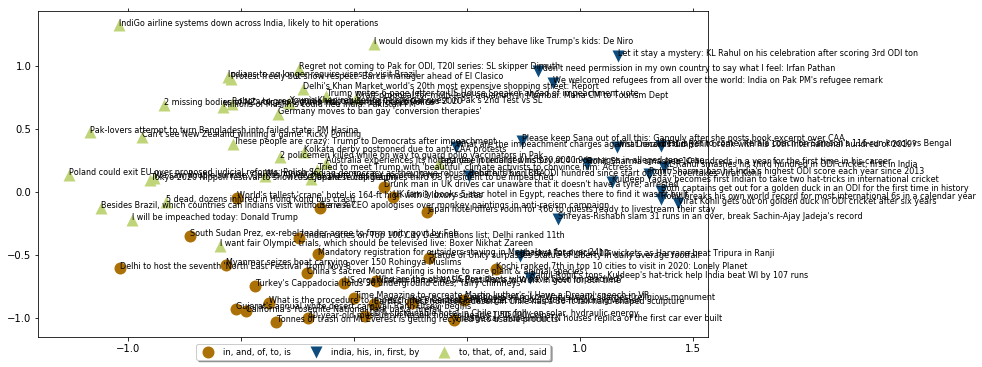

In [101]:
plot_clusters(num_clusters=3, 
              feature_matrix=feature_matrix,
              cluster_data=cluster_data, 
              data=data,
              plot_size=(12,6))